#### Exemplo didático de como criar e alimentar um banco de dados a partir de uma fonte externa, realizar consultas, inserir consultas e exportar as consultas geradas para um arquivo no computador.

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
from pymongo import MongoClient # Importamos o MongoClient para conectar nossa aplicação ao MongoDB
import matplotlib.pyplot as plt
%matplotlib notebook

In [32]:
# Ler e carregar base de dados
investimentos_df = pd.read_excel('Base de Investimentos.xlsx', index_col = None, header = 0, decimal = '.')
display(investimentos_df) # Apresenta ao usuário

,Dias Úteis,Investimento,Rendimento,Lucro,Lucro Percentual
0,1,4995.99,4995.99,0.00,1.000000
1,2,4995.99,4916.22,-79.77,0.984033
2,3,4995.99,5093.68,97.69,1.019554
3,4,4995.99,5054.99,59.00,1.011809
4,5,4995.99,5132.98,136.99,1.027420
...,...,...,...,...,...
333,334,3999.39,4608.85,609.46,1.152388
334,335,3999.39,4722.45,723.06,1.180793
335,336,3999.39,4418.11,418.72,1.104696
336,337,3999.39,4624.83,625.44,1.156384


<IPython.core.display.Javascript object>


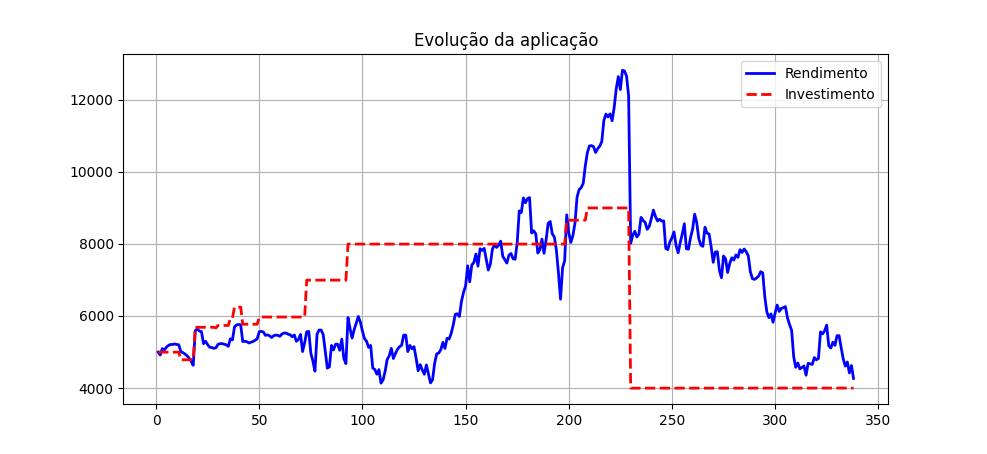

In [33]:
# plt.bar(investimentos_df['Dias Úteis'], investimentos_df['Rendimento'])

# plt.plot('Dias Úteis', 'Rendimento', data = investimentos_df)

# plt.plot(investimentos_df['Dias Úteis'], investimentos_df['Rendimento'],
#         color = 'blue', marker = 'o', linestyle = 'solid', linewidth = 2, markersize = 1)

# plt.plot(investimentos_df['Dias Úteis'], investimentos_df['Investimento'],
#         color = 'red', marker = 'o', linestyle = 'dashed', linewidth = 2, markersize = 1)

plt.plot(investimentos_df['Dias Úteis'], investimentos_df['Rendimento'],
         color = 'blue', linestyle = 'solid', label = 'Rendimento', linewidth = 2)

plt.plot(investimentos_df['Dias Úteis'], investimentos_df['Investimento'],
         color = 'red', linestyle = 'dashed', label = 'Investimento', linewidth = 2)

plt.grid()
plt.legend()
plt.title('Evolução da aplicação')
plt.show()

In [2]:
# Estabelecer a conexão ao banco de dados
connection = MongoClient('localhost', 27017)

# Uma única instância do MongoDB pode suportar diversos bancos de dados
database = connection.investimentos # Criar o banco de dados de nome investimentos

# Uma coleção é um grupo de documentos armazenados no MongoDB (similar ao conceito de tabelas em bancos relacionais)
criptoativos = database.criptoativos # Criar coleção de nome criptoativos
ethereum = database.ethereum # Criar coleção de nome criptoativos

#### <font color='red'>Uma nota importante sobre coleções (e bancos de dados) no MongoDB é que eles são criados posteriormente - nenhum dos comandos acima executou efetivamente qualquer operação no servidor MongoDB. Coleções e Bancos de Dados são criados quando o primeiro documento é inserido.</font>

#### <font color='red'>Dados no MongoDB são representados (e armazenados) usando documentos JSON (Java Script Object Notation). Com o PyMongo usamos dicionários para representar documentos.</font>

In [35]:
# Transformar o dataframe em dicionário 
# Cada linha se torna um dicionário onde chave é o nome da coluna e valor são os dados na célula
# Um lista onde cada item é um dicionário com um registro do dataframe
investimentos_dict = investimentos_df.to_dict('records')

In [49]:
for registro in investimentos_dict: # Laço para percorrer todos os registros
    criptoativos.insert_one(registro) # Inserir cada registro (documento) na coleção (tabela)

In [50]:
ethereum.insert_many(investimentos_dict); # Inserir vários documentos (registros) de uma vez

In [ ]:
# A função find() retorna um cursor e podemos então navegar pelos dados de uma coleção (tabela)
for documento in criptoativos.find(): # Laço para iterar sobre cada documento (registro)
    print(documento) # Apresentar ao usuário

In [ ]:
documentos = ethereum.find() # Retorna um cursor com todos os documentos de uma coleção (tabela)
list(documentos) # Transformar cursor em lista de registros (documentos)

In [51]:
ethereum.index_information

<bound method Collection.index_information of Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'investimentos'), 'ethereum')>

In [52]:
print(database.name) # Verificar o nome do banco de dados não relacional
print(database.list_collection_names()) # Listar o nome das coleções existentes no banco de dados não relacional

investimentos
['ethereum', 'criptoativos']


In [3]:
print(connection.list_database_names()) # Listar os bancos de dados disponíveis

['admin', 'config', 'investimentos', 'local']


In [57]:
database.create_collection('example') # Criar uma coleção (tabela)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'investimentos'), 'example')

In [58]:
database.drop_collection('example') # Excluir uma coleção (tabela)

{'nIndexesWas': 1, 'ns': 'investimentos.example', 'ok': 1.0}

In [4]:
print(criptoativos.estimated_document_count()) # Contar os documentos presentes em uma coleção

338


In [40]:
dados = criptoativos.find() # Ler todos os registros existentes na coleção de nome criptoativos
dados = list(dados) # Converter o resultado em uma lista
# criptoativos_df = pd.DataFrame.from_dict(dados) # Transformar a lista de registros em um dataframe
criptoativos_df = pd.DataFrame.from_records(dados) # Transformar a lista de registros em um dataframe
# criptoativos_df = criptoativos_df.drop(columns = "_id") # Retirar a coluna de nome _id do dataframe
display(criptoativos_df) # Apresentar o dataframe ao usuário

,_id,Dias Úteis,Investimento,Rendimento,Lucro,Lucro Percentual
0,621f76a64532f192340afec4,1,4995.99,4995.99,0.00,1.000000
1,621f76a64532f192340afec5,2,4995.99,4916.22,-79.77,0.984033
2,621f76a64532f192340afec6,3,4995.99,5093.68,97.69,1.019554
3,621f76a64532f192340afec7,4,4995.99,5054.99,59.00,1.011809
4,621f76a64532f192340afec8,5,4995.99,5132.98,136.99,1.027420
...,...,...,...,...,...,...
333,621f76a64532f192340b0011,334,3999.39,4608.85,609.46,1.152388
334,621f76a64532f192340b0012,335,3999.39,4722.45,723.06,1.180793
335,621f76a64532f192340b0013,336,3999.39,4418.11,418.72,1.104696
336,621f76a64532f192340b0014,337,3999.39,4624.83,625.44,1.156384


In [41]:
# Salvar dataframe contendo os registros da consulta ao banco de dados como arquivo excel no computador
criptoativos_df.to_excel('Criptoativos Consulta.xlsx', header = True, index = False, sheet_name = 'Dados', columns = None)